# Randomness

In [1]:
from datascience import *

Matplotlib is building the font cache; this may take a moment.


In [3]:
import numpy as np

In [4]:
two_groups = make_array('treatment','control')
print(two_groups)
np.random.choice(two_groups)

['treatment' 'control']


'treatment'

In [5]:
np.random.choice(two_groups, 10)

array(['treatment', 'control', 'treatment', 'control', 'treatment',
       'control', 'control', 'control', 'control', 'treatment'],
      dtype='<U9')

## Booleans and Comparison

In [14]:
np.random.choice(two_groups) == 'treatment' #each run is(may be) different. 50% chance for treatement or control

True

In [17]:
tosses = make_array('Tails', 'Heads', 'Tails', 'Heads', 'Heads')
tosses == 'Heads'

array([False,  True, False,  True,  True])

In [19]:
np.count_nonzero(tosses == 'Heads') #count the number of True values

3

## Betting on a Die

In [21]:
def one_bet(x):
    """Returns my net gain if the die shows x spots"""
    if x <= 2:
        return -1
    elif x <= 4:
        return 0
    elif x <= 6:
        return 1

In [22]:
one_bet(1), one_bet(2), one_bet(3), one_bet (4), one_bet(5), one_bet(6)

(-1, -1, 0, 0, 1, 1)

In [45]:
one_bet(np.random.choice(np.arange(1, 7)))

-1

In [48]:
def bet_on_one_roll():
    """Returns my net gain on one bet"""
    x = np.random.choice(np.arange(1, 7))  # roll a die once and record the number of spots
    if x <= 2:
        return -1
    elif x <= 4:
        return 0
    elif x <= 6:
        return 1

In [49]:
for i in np.arange(5):
    print(bet_on_one_roll())

1
0
-1
-1
0


## Betting on 5 Rolls

In [50]:
outcomes = make_array()

In [51]:
for i in np.arange(5):
    outcome_of_bet = bet_on_one_roll()
    outcomes = np.append(outcomes, outcome_of_bet)
    
outcomes

array([ 0.,  0., -1., -1., -1.])

## Betting on 300 Rolls

In [52]:
outcomes = make_array()

for i in np.arange(300):
    outcome_of_bet = bet_on_one_roll()
    outcomes = np.append(outcomes, outcome_of_bet)
len(outcomes)

300

In [56]:
%matplotlib inline

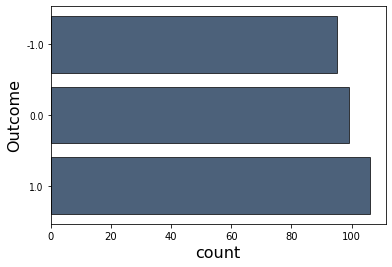

In [57]:
outcome_table = Table().with_column('Outcome', outcomes)
outcome_table.group('Outcome').barh(0)

## Simulation 

In [58]:
coin = make_array('Heads', 'Tails')

In [61]:
ten_tosses = np.random.choice(coin, 10)
ten_tosses

array(['Heads', 'Heads', 'Tails', 'Tails', 'Tails', 'Heads', 'Tails',
       'Tails', 'Heads', 'Heads'], dtype='<U5')

In [62]:
np.count_nonzero(ten_tosses == 'Heads')

5

In [74]:
outcomes = np.random.choice(coin, 100)
num_heads = np.count_nonzero(outcomes == 'Heads')
num_heads

54

In [111]:
# An empty array to collect the simulated values
heads = make_array()

# Repetitions sequence
num_repetitions = 10000
repetitions_sequence = np.arange(num_repetitions)

# for loop
for i in repetitions_sequence:
    
    # simulate one value
    outcomes = np.random.choice(coin, 100)
    num_heads = np.count_nonzero(outcomes == 'Heads')
    
    # augment the collection array with the simulated value
    heads = np.append(heads, num_heads)  

# That's it! The simulation is done.

In [112]:
len(heads)

10000

In [113]:

simulation_results = Table().with_column(# the with_coloums final 's' is missing in the book
    'Repetition', np.arange(1, num_repetitions + 1),
    'Number of Heads', heads
)

In [98]:
simulation_results

Repetition,Number of Heads
1,46
2,54
3,54
4,49
5,53
6,45
7,53
8,48
9,52
10,55


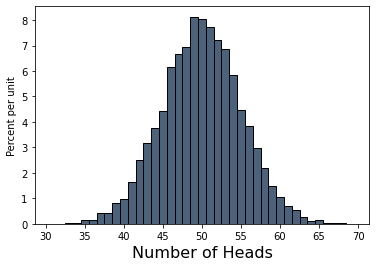

In [99]:
simulation_results.hist('Number of Heads', bins = np.arange(30.5, 69.6, 1))

## Comparing histogram for different number of repetitions

In [105]:
def simulate_100_dices_hist(n):

    heads = make_array()

    num_repetitions = n

    for i in np.arange(num_repetitions):
        outcomes = np.random.choice(coin, 100)
        heads = np.append(heads, np.count_nonzero(outcomes == 'Heads'))


    simulation_results = Table().with_column(# the with_coloums final 's' is missing in the book
        'Repetition', np.arange(1, num_repetitions + 1),
        'Number of Heads', heads
    )


    simulation_results.hist('Number of Heads', bins = np.arange(30.5, 69.6, 1))

### 100 repetitions

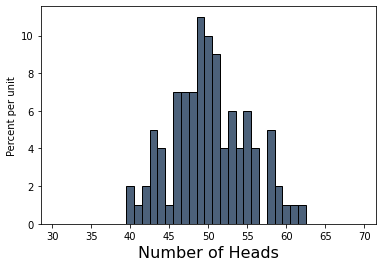

In [106]:
simulate_100_dices_hist(100)

### 1000 repetitions

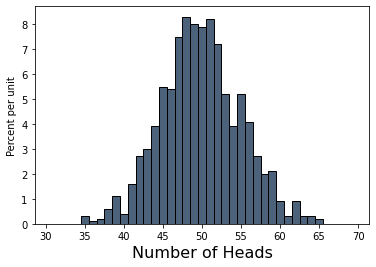

In [107]:
simulate_100_dices_hist(1000)

### 10000 repetitions

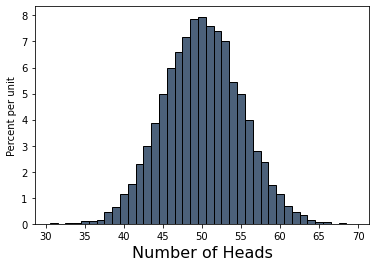

In [109]:
simulate_100_dices_hist(10000)

### 100000 repetitions

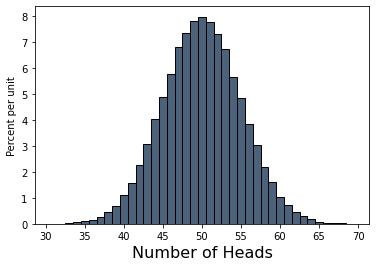

In [117]:
simulate_100_dices_hist(100000) # The curve is becoming perfectly normal with mean equal to 50

## Moves in Monopoly

In [118]:
die = np.arange(1, 7)
sum(np.random.choice(die, 2))

5

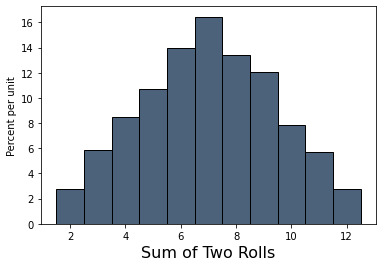

In [119]:
moves = make_array()

num_repetitions = 10000

for i in np.arange(num_repetitions):
    one_move = sum(np.random.choice(die, 2))
    moves = np.append(moves, one_move)
    
results = Table().with_column(
    'Repetition', np.arange(1, num_repetitions + 1),
    'Sum of Two Rolls', moves
)

results.hist('Sum of Two Rolls', bins = np.arange(1.5, 12.6, 1))

## The Monty Hall Problem

In [121]:
goats = make_array('first goat', 'second goat')

In [122]:
def other_goat(x):
    if x == 'first goat':
        return 'second goat'
    elif x == 'second goat':
        return 'first goat'

In [123]:
other_goat('first goat'), other_goat('second goat'), other_goat('watermelon')

('second goat', 'first goat', None)

In [124]:
hidden_behind_doors = make_array('car', 'first goat', 'second goat')

In [125]:
def monty_hall_game():
    """Return 
    [contestant's guess, what Monty reveals, what remains behind the other door]"""
    
    contestant_guess = np.random.choice(hidden_behind_doors)
    
    if contestant_guess == 'first goat':
        return [contestant_guess, 'second goat', 'car']
    
    if contestant_guess == 'second goat':
        return [contestant_guess, 'first goat', 'car']
    
    if contestant_guess == 'car':
        revealed = np.random.choice(goats)
        return [contestant_guess, revealed, other_goat(revealed)]

In [148]:
monty_hall_game()

['first goat', 'second goat', 'car']

In [149]:
games = Table(['Guess', 'Revealed', 'Remaining'])

In [150]:
for i in np.arange(10000):
    games.append(monty_hall_game())

In [151]:
original_choice = games.group('Guess')
original_choice

Guess,count
car,3299
first goat,3336
second goat,3365


In [152]:
remaining_door = games.group('Remaining')
remaining_door

Remaining,count
car,6701
first goat,1680
second goat,1619


In [153]:
joined = original_choice.join('Guess', remaining_door, 'Remaining')
combined = joined.relabeled(0, 'Item').relabeled(1, 'Original Door').relabeled(2, 'Remaining Door')
combined

Item,Original Door,Remaining Door
car,3299,6701
first goat,3336,1680
second goat,3365,1619


## Finding Probabilities

In [154]:
rolls = np.arange(1, 51, 1)
results = Table().with_column(
    'Rolls', rolls,
    'Chance of at least one 6', 1 - (5/6)**rolls
)
results

Rolls,Chance of at least one 6
1,0.166667
2,0.305556
3,0.421296
4,0.517747
5,0.598122
6,0.665102
7,0.720918
8,0.767432
9,0.806193
10,0.838494


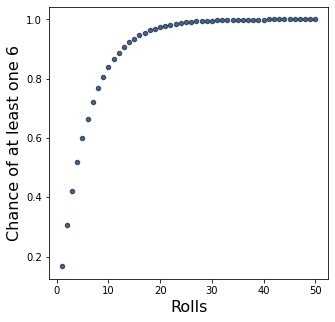

In [155]:
results.scatter('Rolls')

In [156]:
results.where('Rolls', are.equal_to(50))

Rolls,Chance of at least one 6
50,0.99989
